[('Jew Nard', [9, 6, 9, 6, 8, 6, 10]), ('The Gina Palaces', [7, 10, 7, 4, 3, 3, 8]), ('Buy the Dipp', [2, 2, 2, 10, 9, 7, 9]), ('Bed Sh1tt3rs', [8, 7, 3, 3, 7, 8, 3]), ('Travis what if they twins', [4, 5, 6, 7, 10, 2, 5]), ('Djibouti Booties', [10, 3, 8, 8, 4, 4, 1]), ('Babe  Davis ', [6, 8, 1, 9, 5, 1, 4]), ('Team Coach', [5, 1, 10, 5, 2, 5, 6]), ('Ethiopian Kidests', [1, 9, 4, 1, 1, 10, 7]), ("Biden's America", [3, 4, 5, 2, 6, 9, 2])]
[['Jew Nard', 9, 6, 9, 6, 8, 6, 10], ['The Gina Palaces', 7, 10, 7, 4, 3, 3, 8], ['Buy the Dipp', 2, 2, 2, 10, 9, 7, 9], ['Bed Sh1tt3rs', 8, 7, 3, 3, 7, 8, 3], ['Travis what if they twins', 4, 5, 6, 7, 10, 2, 5], ['Djibouti Booties', 10, 3, 8, 8, 4, 4, 1], ['Babe  Davis ', 6, 8, 1, 9, 5, 1, 4], ['Team Coach', 5, 1, 10, 5, 2, 5, 6], ['Ethiopian Kidests', 1, 9, 4, 1, 1, 10, 7], ["Biden's America", 3, 4, 5, 2, 6, 9, 2]]
                        Team  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6   
0                   Jew Nard       9       6       9      

<Axes: title={'center': 'Bonage Index (BI)'}, xlabel='Team', ylabel='Bonage'>

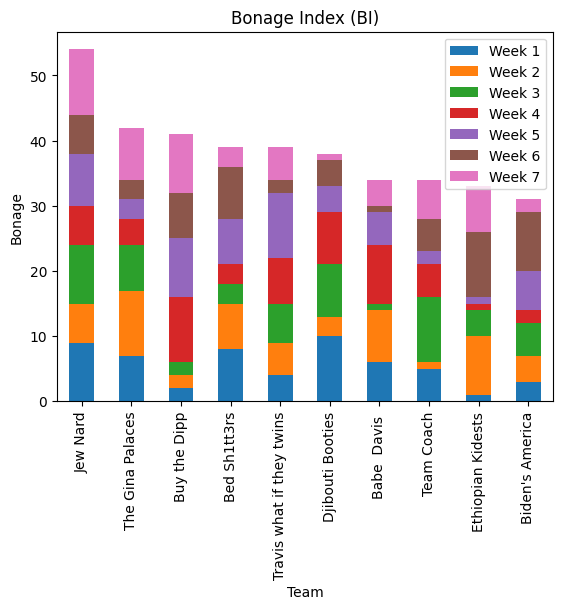

In [36]:
from espn_api.football import League
import matplotlib as plt
import pandas as pd
import numpy as np

league = League(league_id=64612107, year=2023, espn_s2='AECM85hbXZD%2FFG9s2ALIuE4XrHUPYodyji1oDVpO17ISfafgY9b9kxJ4QZaG1FiR1nVU0UW%2FtIQoPvtOfxxlA2y9xKn4dFzG1FO%2BNdP6ZsZZNly5BCtfCznME5sc8OJhBcY7nEjYRQ6b6tAtQvXYyvV65Ya6Hk4klxd0iIBzk6S82ZZiob5i8%2BThUSpeh0sUypUA%2FdpC06ZhaEVy9B0qVL%2B3tL8T3pK44imaNmSCGrLEmtTb5xmhmKIQYPPmE99IEvNy9ltr9DfPmJucfiPMVAfBcWaZUpEAE160r4SsIszqsw%3D%3D', swid='F71F32C4-9869-4DFB-A620-ADD15AA67520')
# league = League(league_id=1927423163, year=2023, espn_s2='AECM85hbXZD%2FFG9s2ALIuE4XrHUPYodyji1oDVpO17ISfafgY9b9kxJ4QZaG1FiR1nVU0UW%2FtIQoPvtOfxxlA2y9xKn4dFzG1FO%2BNdP6ZsZZNly5BCtfCznME5sc8OJhBcY7nEjYRQ6b6tAtQvXYyvV65Ya6Hk4klxd0iIBzk6S82ZZiob5i8%2BThUSpeh0sUypUA%2FdpC06ZhaEVy9B0qVL%2B3tL8T3pK44imaNmSCGrLEmtTb5xmhmKIQYPPmE99IEvNy9ltr9DfPmJucfiPMVAfBcWaZUpEAE160r4SsIszqsw%3D%3D', swid='F71F32C4-9869-4DFB-A620-ADD15AA67520')

total_opp_rank_dic = {}
for team in league.teams:
    total_opp_rank_dic[team.team_id] = {"team_name" : team.team_name, "opp_rank_list" : list(), "opp_rank_sum": 0}

num_weeks = 7

for i in range(1, num_weeks + 1):
    box_scores = league.box_scores(week=i)
    id_score_arr = list()

    for box_score in box_scores:
        id_score_arr.append((box_score.home_team.team_id, box_score.home_score))
        id_score_arr.append((box_score.away_team.team_id, box_score.away_score))
        
    id_score_arr.sort(key=lambda team: team[1])

    ranking_dic = {}
    for i, scores in enumerate(id_score_arr):
        ranking_dic[scores[0]] = i + 1


    for box_score in box_scores:
        total_opp_rank_dic[box_score.home_team.team_id]["opp_rank_list"].append(ranking_dic[box_score.away_team.team_id])
        total_opp_rank_dic[box_score.away_team.team_id]["opp_rank_list"].append(ranking_dic[box_score.home_team.team_id])

# view data
all_team_opp_rank_list = list()
for key in total_opp_rank_dic:
    (name, opp_rank_arr) = total_opp_rank_dic[key]["team_name"], total_opp_rank_dic[key]["opp_rank_list"]
    all_team_opp_rank_list.append((name, opp_rank_arr))

all_team_opp_rank_list.sort(key=lambda team: sum(team[1]), reverse=True)
print(all_team_opp_rank_list)

name_all_scores = []
for team in all_team_opp_rank_list:
    team[1].insert(0, team[0])
    name_all_scores.append(team[1])

df_columns = ["Team"]
for i in range(1, num_weeks + 1):
    df_columns.append("Week " + str(i))

print(name_all_scores)
df = pd.DataFrame(name_all_scores, columns=df_columns)

print(df)
df.plot(x="Team", ylabel="Bonage",kind='bar', stacked=True, title='Bonage Index (BI)')